## Nameeta Tiwari

Analysis on Data Analycist Salary 

1) Univariate Analysis on
    a.Experience Level of Employees
    b. Employees Residence
2) Bivariate Analysis on
    a.Salary vs. Employment Type
    b. Country vs. Number of job listings
    c. Number of job listings vs. Company Size

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import statistics as stat

In [22]:
salary = "./ds_salaries.csv"
salary_df=pd.read_csv(salary)
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [23]:
#Counting Rows and Columns in dataset
Rows = len(salary_df.axes[0])
Columns = len(salary_df.axes[1])

#print(f"Total Rows : {Rows},  Total Columns : {Columns}")

In [24]:
Summary_df = salary_df.info()
#Summary_df
#salary_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [25]:
#Checking for Null/Empty values in the dataset
no_entry_cell = salary_df.isnull().sum()
#no_entry_cell

#No empty cell was found in the dataset. 

In [26]:
#Find duplicate rows
duplicate_rows = salary_df[salary_df.duplicated()]
#Remove duplicate rows
salary_df = salary_df.drop_duplicates()
#salary_df

In [27]:
#Value counting for each columns for unique entries
value_counts = {column: salary_df[column].value_counts() for column in salary_df.columns}
#value_counts

In [28]:
#Creating and replacing  dictionary for Experience column
Exp_Dictionary={
    "SE": "Senior Level",
    "MI": "Medium Level",
    "EN": "Entry Level",
    "EX": "Executive Level"
}
salary_df["experience_level"]=salary_df["experience_level"].replace(Exp_Dictionary)
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,Medium Level,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,Medium Level,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior Level,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior Level,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior Level,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,Medium Level,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,Entry Level,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,Entry Level,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [29]:
#Categorical Analysis of Experience Level

Total_Exp_Count=salary_df["experience_level"].value_counts()
Total_Exp_Count

experience_level
Senior Level       1554
Medium Level        664
Entry Level         270
Executive Level      96
Name: count, dtype: int64

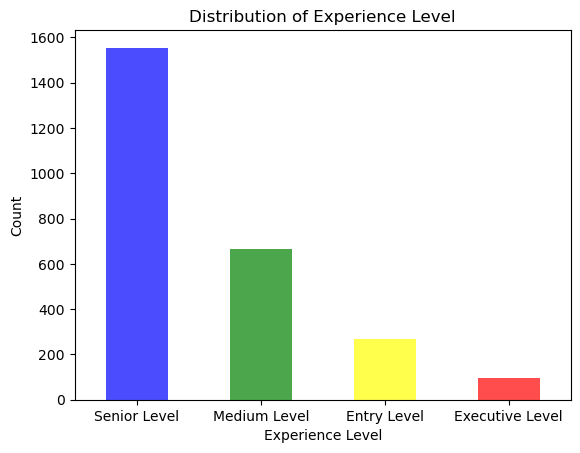

In [30]:
#Creating Plot to show the categorical analysis of Experience_level
color=["blue", "green", "yellow", "red"]
Map1 = Total_Exp_Count.plot(kind="bar", color=color, alpha=0.7)
plt.xticks(rotation="horizontal")
plt.title("Distribution of Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Count")
plt.savefig("output_data_NT/Fig1_distribution_Experience_Level.png")
plt.show()

In [31]:
#Experience Level Percentage
Perc_Explevel = Total_Exp_Count * 100 /salary_df["experience_level"].count()
#Perc_Explevel

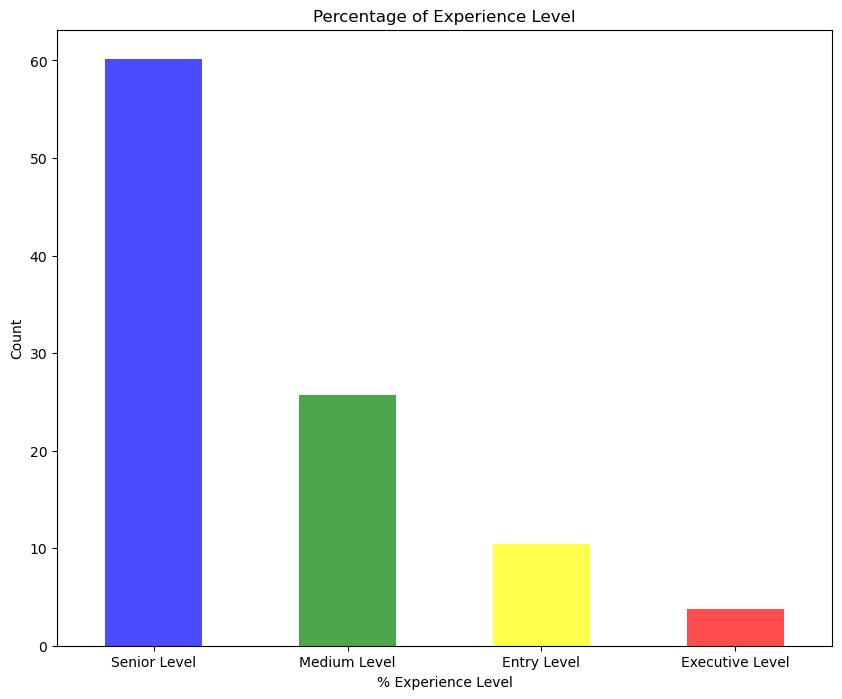

In [32]:
#Creating Plot to show the categorical analysis of Experience_level
color=["blue", "green", "yellow", "red"]
fig = plt.figure(figsize = (10,8))
Map2 = Perc_Explevel.plot(kind="bar", color=color, alpha=0.7)
plt.xticks(rotation="horizontal")
plt.title("Percentage of Experience Level")
plt.xlabel("% Experience Level")
plt.ylabel("Count")
plt.savefig("output_data_NT/Fig2_distribution_%_Experience_Level.png")
plt.show()

employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64


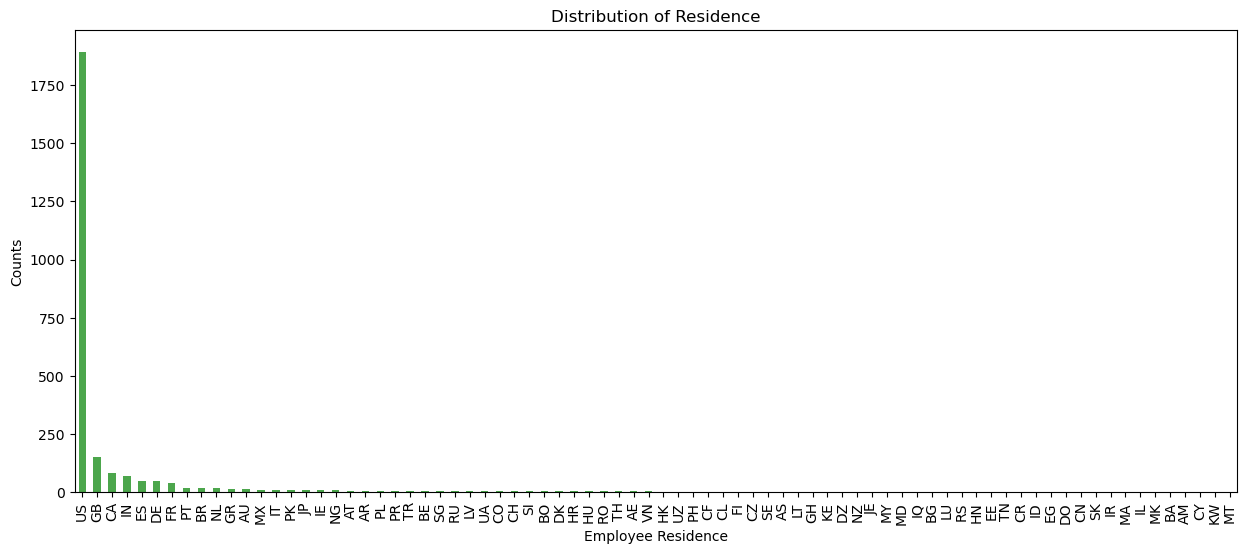

In [33]:
#plot bar chart for Residence of Employee
Emp_Residence =salary_df["employee_residence"].value_counts()
print(Emp_Residence)
fig = plt.figure(figsize = (15,6))
Emp_Residence.plot(kind="bar", color="green", alpha=0.7)

plt.xlabel("Employee Residence")
plt.ylabel("Counts")
plt.title("Distribution of Residence")
plt.xticks(rotation=90)
plt.savefig("output_data_NT/Fig3_distribution_Residence.png")
plt.show()

In [34]:
Top10_Resi=salary_df["employee_residence"].value_counts().head(10)
#Top10_Resi

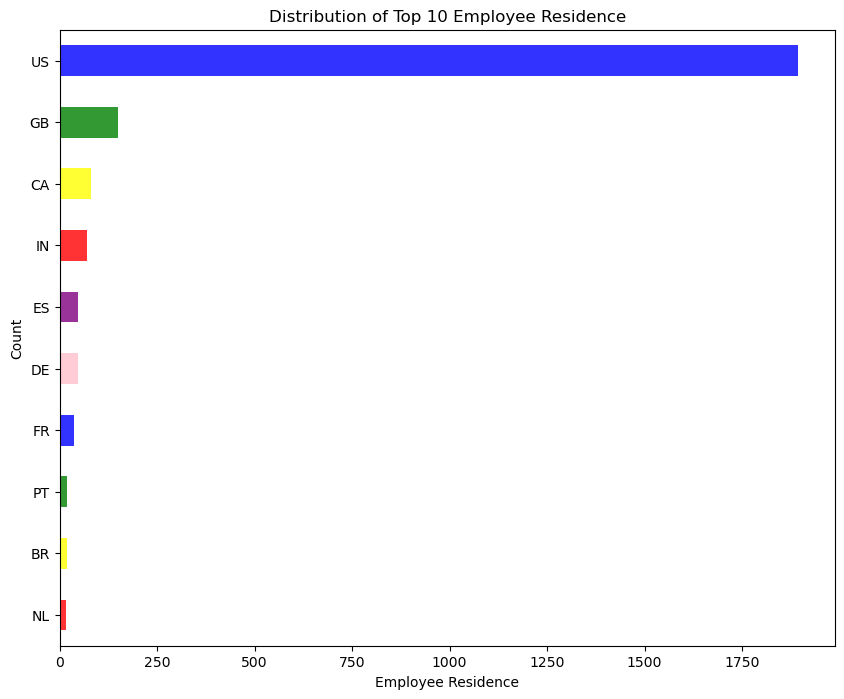

In [35]:
#There are 78 rows unique values for employee residence, so plotting for sample of top 10 employee residence

fig = plt.figure(figsize = (10,8))
color=["blue", "green", "yellow", "red", "purple", "pink"]
Map2 = Top10_Resi.plot(kind="barh", color=color, alpha=0.8).invert_yaxis()
plt.xticks(rotation="horizontal")
plt.title("Distribution of Top 10 Employee Residence")
plt.xlabel("Employee Residence")
plt.ylabel("Count")
plt.savefig("output_data_NT/Fig4_distribution_Top10_Employee_Residence.png")
plt.show()

# Univariant Analysis :
1. Distibution of Experience Level :
    The graph shows Senior Level experience has maximum number of entries in the dataset followed by Medium level, Entry level and Executive level.
    
2. Distribution of Employee Residence:
    73% of total employees are resident of US followed by GB, CA, ES, IN and so on.
     

In [36]:
#Creating and Replacing Employment Type 
Emp_dict={
    "FT" : "Full Time",
    "PT" : "Part Time",
    "CT" : "Contractual",
    "FL" : "Freelancer"
}
salary_df["employment_type"] = salary_df["employment_type"].replace(Emp_dict)


In [37]:
#Employment_df = salary_df["employment_type"].value_counts()
#fig = plt.figure(figsize = (8,6))
#Emp_Type_df=Employment_df.plot(kind="bar")
#plt.title("Employment Type Distribution")
#plt.savefig("output_data_NT/Fig4_distribution_Employment_Type.png")
#plt.show()

In [38]:
# Put employment type into a list for for loop (and later for plot labels)
Employment_Type =  ["Full Time", "Contractual", "Freelancer", "Part Time"]

# Create empty list to fill with salary (for plotting)
Salary_Data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for Emp in Employment_Type: 
    
    # Locate the rows which contain employment type and get the employment
    Salary_DF = salary_df.loc[salary_df["employment_type"] == Emp, "salary_in_usd"]
    
    # add subset 
    Salary_Data.append(Salary_DF)
    
    # Determine outliers using upper and lower bounds
    Quartiles =  Salary_DF.quantile([.25, .5, .75])
    LowerQuart = Quartiles[0.25]
    UpperQuart = Quartiles[0.75]
    iqr = UpperQuart-LowerQuart
    
    LowerBound = LowerQuart - (1.5 * iqr)
    UpperBound = UpperQuart + (1.5 * iqr)
    
    Outliers = Salary_DF.loc[(Salary_DF < LowerBound) |  (Salary_DF > UpperBound)]

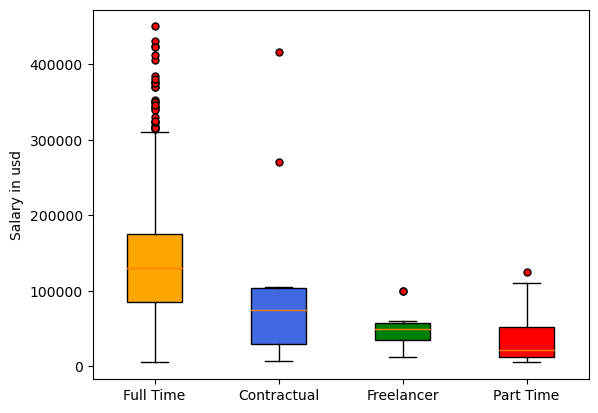

In [39]:
# Generate a box plot that shows the distrubution of salary over employment type.

OutlierPoint = dict(markerfacecolor="red", markersize = 5)
box=plt.boxplot(Salary_Data, labels=Employment_Type, patch_artist=True, flierprops=OutlierPoint)
colors = ['orange', 'royalblue', 'green',  'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel("Salary in usd")
plt.savefig("output_data_NT/Fig5_distribution_Salary_Employment.png")
plt.show()

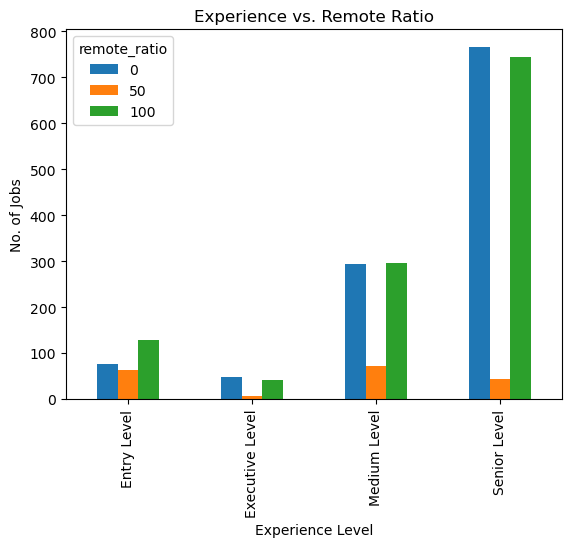

In [40]:
#Analysis of distribution over Experience over Remote Ratio

reduced_dataframe=salary_df.groupby(["experience_level"]).remote_ratio.value_counts().reset_index(name="no_of_jobs")
experience_employment_Df=reduced_dataframe.groupby(["experience_level"])["no_of_jobs"].sum()
making_dataframe=experience_employment_Df.to_frame().reset_index()
final_dataframe_Emp_Exp = reduced_dataframe[reduced_dataframe["experience_level"].isin(making_dataframe["experience_level"])]
pivot_dataframe_plotting=final_dataframe_Emp_Exp.pivot(index="experience_level", columns ="remote_ratio", values ="no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title("Experience vs. Remote Ratio")
plt.xlabel('Experience Level')
plt.ylabel('No. of Jobs')
plt.savefig("output_data_NT/Fig6_distribution_Experience_Remote.png")
plt.show()

